# Linear Classifier 
Without using scikit-learn or similar libraries

Viewing the dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/Victor/Documents/datasets/dogs_cats.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   2000 non-null   int64  
 1   comprimento  2000 non-null   float64
 2   peso         2000 non-null   float64
 3   classe       2000 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 62.6+ KB


In [4]:
df.head()

,Unnamed: 0,comprimento,peso,classe
0,0,45.231415,431.548671,cachorro
1,1,38.003753,517.870914,gato
2,2,53.608592,444.025762,cachorro
3,3,39.315731,524.066579,gato
4,4,45.581301,450.552000,cachorro


In [5]:
df.tail()

,Unnamed: 0,comprimento,peso,classe
1995,1995,37.590457,587.274926,gato
1996,1996,43.818870,416.846089,cachorro
1997,1997,36.876470,483.215531,gato
1998,1998,49.415613,514.637485,cachorro
1999,1999,37.640400,548.746906,gato


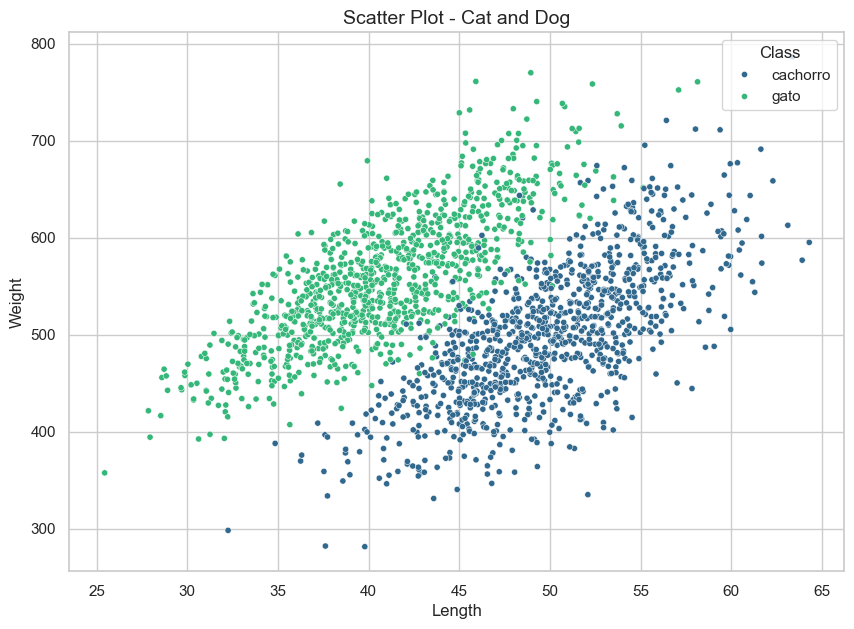

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Scatter plot
plt.figure(figsize=(10,7))
scatter = sns.scatterplot(data=df, x='comprimento', y='peso', hue='classe', palette='viridis', s=20)

# Titles and labels
plt.title('Scatter Plot - Cat and Dog', fontsize=14)
plt.xlabel('Length', fontsize=12)
plt.ylabel('Weight', fontsize=12)

# Show legend
plt.legend(title='Class', loc='upper right')

# Show plot
plt.show()

Treinamento, teste e aplicação do modelo

In [7]:
# Data selection
X = df[['comprimento', 'peso']].values
y = df['classe'].map({'cachorro': 0, 'gato': 1}).values

In [8]:
# Data normalization
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Column of 1s for the bias, which follows the equation of a linear model
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [9]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [10]:
# Log loss function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

In [11]:
# Gradient descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

In [12]:
# Initializing parameters
theta = np.zeros(X.shape[1])
learning_rate = 0.01
iterations = 10000


In [13]:
# Training
theta, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)

In [14]:
# Prediction function
def predict(X, theta):
    return np.round(sigmoid(np.dot(X, theta)))

In [15]:
#  Predictions on the same data
y_pred = predict(X, theta)

In [16]:
# Accuracy
accuracy = np.mean(y_pred == y) * 100
print(f'Acurácia: {accuracy}%')

Acurácia: 96.95%
